In [2]:
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
data = pd.read_csv('Speckles/speckle_num_0.csv')

print(data)
data_1 = pd.concat([data['screen'], (data['spec_re'] ** 2 + data['spec_im'] ** 2).rename('spec')], axis = 1)
print(data_1)

      Unnamed: 0  screen   spec_re   spec_im
0              0  -10.00  0.022826  0.020843
1              1   -9.98  0.006950  0.027782
2              2   -9.96  0.023066 -0.013997
3              3   -9.94  0.032869  0.015774
4              4   -9.92  0.014669 -0.020968
...          ...     ...       ...       ...
996          996    9.92  0.044173 -0.026273
997          997    9.94  0.001200 -0.008679
998          998    9.96 -0.001887  0.005036
999          999    9.98 -0.008636 -0.022830
1000        1000   10.00 -0.000071  0.012272

[1001 rows x 4 columns]
      screen      spec
0     -10.00  0.000955
1      -9.98  0.000820
2      -9.96  0.000728
3      -9.94  0.001329
4      -9.92  0.000655
...      ...       ...
996     9.92  0.002641
997     9.94  0.000077
998     9.96  0.000029
999     9.98  0.000596
1000   10.00  0.000151

[1001 rows x 2 columns]


In [4]:
dat = data_1['spec'].to_numpy()
type(dat[0])

numpy.float64

In [5]:
fig = px.line(data_1, x = 'screen', y = 'spec', title = 'Little test')
fig.show()

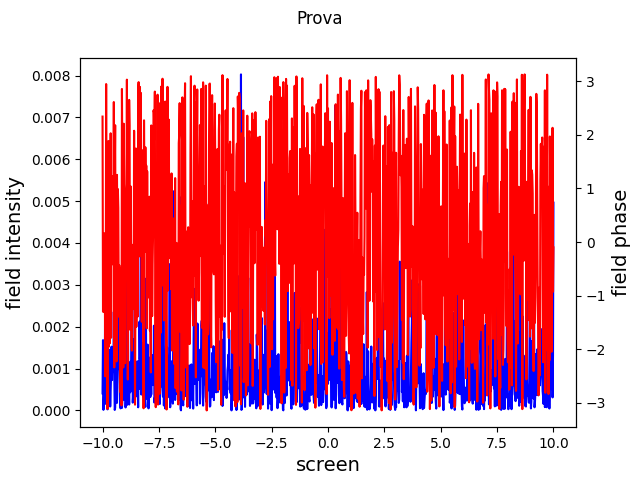

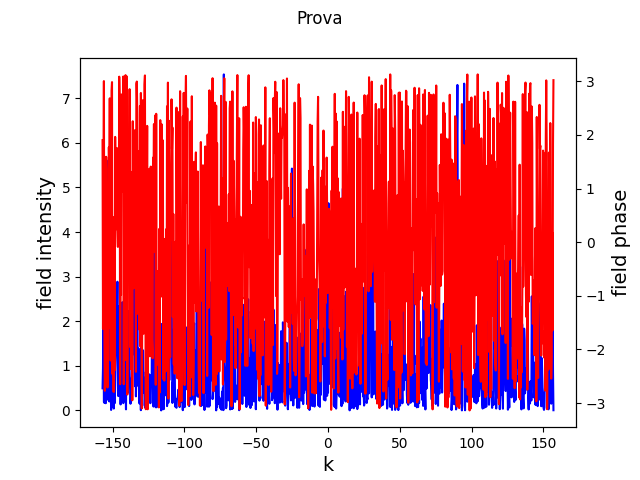

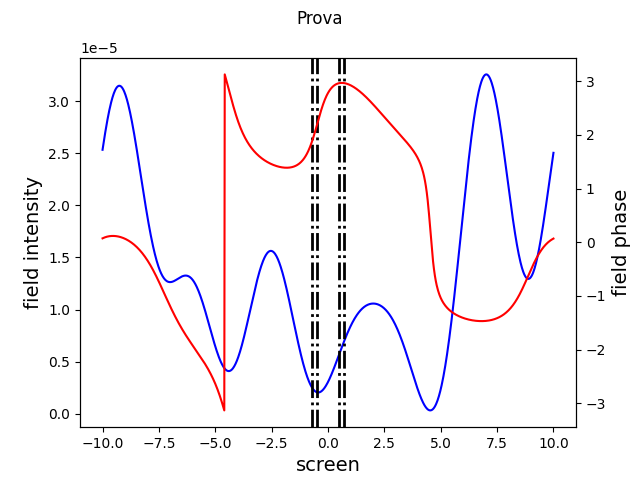

In [33]:
import module as mod
import os
%matplotlib widget
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft, fftshift, ifftshift

screen_size = 20 # [cm] 
dx = 0.02 # [cm] (resolution)
dim = int(screen_size/dx) + 1 # Dimension of the arrays
pattern = np.zeros(dim) # Array containing the interference pattern

kspace_size = 2 * np.pi/dx
dk = 2 * np.pi/screen_size
kspace = np.linspace(-kspace_size / 2, kspace_size / 2, dim)
    
vect = os.listdir('Speckles')
    
k = 1
for i in vect:
    field_data = pd.read_csv('Speckles/' + i)
    field = field_data['spec_re'].to_numpy() + field_data['spec_im'].to_numpy() * 1j
    screen = field_data['screen'].to_numpy()

    filt_field = mod.filter('Rectangular', field, 2)
    trasf = fftshift(fft(field))
        
    if k == 2:
        fig, ax = plt.subplots()
        fig.suptitle('Prova')

        ax_2 = ax.twinx()


        ax.plot(screen, np.abs(field).real ** 2, label = 'Intensity', color = 'b')
        ax_2.plot(screen, np.angle(field).real, label = 'Phase', color = 'r')
        
        ax.set_xlabel('screen', fontsize = 14)
        ax.set_ylabel('field intensity', fontsize = 14)
        ax_2.set_ylabel('field phase', fontsize = 14)

        fig, ax = plt.subplots()
        fig.suptitle('Prova')

        ax_2 = ax.twinx()


        ax.plot(kspace, np.abs(trasf).real ** 2, label = 'Intensity', color = 'b')
        ax_2.plot(kspace, np.angle(trasf).real, label = 'Phase', color = 'r')
        
        ax.set_xlabel('k', fontsize = 14)
        ax.set_ylabel('field intensity', fontsize = 14)
        ax_2.set_ylabel('field phase', fontsize = 14)

        fig, ax = plt.subplots()
        fig.suptitle('Prova')

        ax_2 = ax.twinx()


        ax.plot(screen, np.abs(filt_field).real ** 2, label = 'Intensity', color = 'b')
        ax_2.plot(screen, np.angle(filt_field).real, label = 'Phase', color = 'r')

        ax.axvline(-0.7, linestyle = '-.', linewidth = 2, color = 'k')
        ax.axvline(-0.5, linestyle = '-.', linewidth = 2, color = 'k')
        ax.axvline(0.5, linestyle = '-.', linewidth = 2, color = 'k')
        ax.axvline(0.7, linestyle = '-.', linewidth = 2, color = 'k')
        
        ax.set_xlabel('screen', fontsize = 14)
        ax.set_ylabel('field intensity', fontsize = 14)
        ax_2.set_ylabel('field phase', fontsize = 14)

    pattern += mod.create_pattern(filt_field, 3e4, 3, 1, screen, dim, 500)
    k = k + 1

data = pd.DataFrame(np.stack((screen, pattern), axis = -1), columns = ['screen', 'pattern'])
fig = px.line(data, x = 'screen', y = 'pattern', title = 'Pattern di interferenza mediato')

In [34]:
fig.show()

Text(0, 0.5, 'pattern')

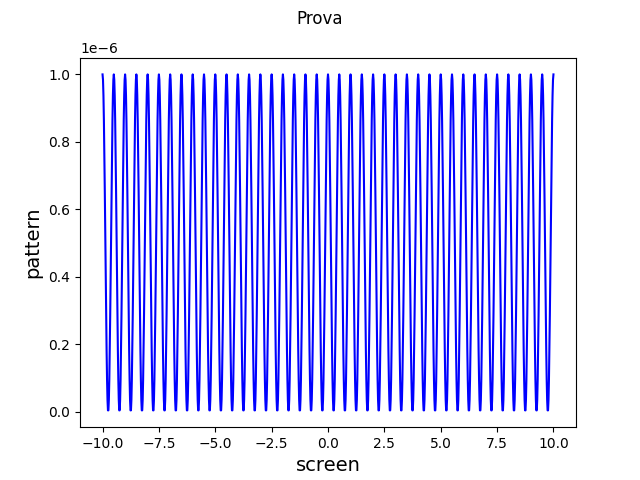

In [28]:
pat = np.exp(1j * 2 * np.pi *  np.sqrt(2000 ** 2 + (-0.1 - screen) ** 2)/5e-5)/np.sqrt(2000 ** 2 + (-0.1 - screen) ** 2) + np.exp(1j * 2 * np.pi * np.sqrt(2000 ** 2 + (0.1 - screen) ** 2)/5e-5)/ np.sqrt(2000 ** 2 + (0.1 - screen) ** 2)

fig, ax = plt.subplots()
fig.suptitle('Prova')


ax.plot(screen, np.abs(pat).real ** 2, label = 'Intensity', color = 'b')

ax.set_xlabel('screen', fontsize = 14)
ax.set_ylabel('pattern', fontsize = 14)

In [2]:
import os

print(os.listdir())

['.git', 'app.py', 'assets', 'cache', 'little_test.ipynb', 'main.py', 'module.py', 'Patterns', 'Speckles', '__pycache__']


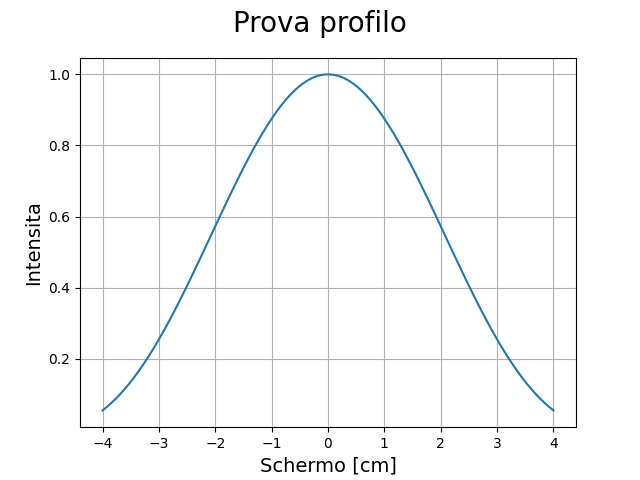

In [7]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dist_2 = 1e4 # [cm]
wavelen = 500 # [nm]
slit_width = 1 # [mm]

wavelen = wavelen / 1e7 # Convert to cm
slit_width = slit_width / 10

screen_cut = np.linspace(-4, 4, 100)

profile = np.sinc(slit_width * screen_cut / (wavelen * dist_2)) ** 2

fig, ax = plt.subplots()

fig.suptitle('Prova profilo', fontsize = 20)

ax.plot(screen_cut, profile)
ax.set_xlabel('Schermo [cm]', fontsize = 14)
ax.set_ylabel('Intensita', fontsize = 14)

ax.grid()

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# measures in [cm]
x = np.linspace(-2.5, 2.5, 500)
a = 0.1 
s = 0.4
lam = 5e-5
z = 1e4

y = np.sinc(2 * (x - s/2) * a / (lam * z)) + np.sinc(2 * (x + s/2) * a / (lam * z)) + np.cos(2 * np.pi * x * s / (lam * z)) * 2* np.sinc(a * s / (lam * z)) * np.sinc(2 * x * a / (lam * z))
y_M = np.sinc(2 * (x - s/2) * a / (lam * z)) + np.sinc(2 * (x + s/2) * a / (lam * z)) + 2 * np.sinc(a * s / (lam * z)) * np.sinc(2 * x * a / (lam * z))
y_m = np.sinc(2 * (x - s/2) * a / (lam * z)) + np.sinc(2 * (x + s/2) * a / (lam * z)) - 2 * np.sinc(a * s / (lam * z)) * np.sinc(2 * x * a / (lam * z))
df = pd.DataFrame({
    'x': x,
    'y': y,
    'prof_up': y_M,
    'prof_down': y_m
})

fig = px.line(df.melt(id_vars = 'x', value_vars = ['y', 'prof_up', 'prof_down']), x = 'x', y = 'value', title = 'Averaged interference pattern', line_group = 'variable', color = 'variable') 

fig.show()

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px

# measures in [cm]
X = np.linspace(-5, 5, 500)
a = 0.1 
s = 0.4
lam = 5e-5
z = 1e4
vis = 0.5

def cosc(x):
    xx = x
    xx[x == 0] = 1
    f = (1 - np.cos(xx))/(xx/2) ** 2
    f[x == 0] = 2
    return f
    
y = cosc(2 * np.pi * (X + s/2) * a / (lam * z)) + cosc(2 * np.pi * (X - s/2) * a / (lam * z)) + 2 * cosc(2 * np.pi * X * a / (lam * z)) * vis * np.cos(2 * np.pi * s * X / (lam * z))
y_M = cosc(2 * np.pi * (X + s/2) * a / (lam * z)) + cosc(2 * np.pi * (X - s/2) * a / (lam * z)) + 2 * cosc(2 * np.pi * X * a / (lam * z)) * vis 
y_m = cosc(2 * np.pi * (X + s/2) * a / (lam * z)) + cosc(2 * np.pi * (X - s/2) * a / (lam * z)) - 2 * cosc(2 * np.pi * X * a / (lam * z)) * vis 

df = pd.DataFrame({
    'x': X,
    'y': y,
    'prof_up': y_M,
    'prof_down': y_m
})

fig = px.line(df.melt(id_vars = 'x', value_vars = ['y', 'prof_up', 'prof_down']), x = 'x', y = 'value', title = 'Averaged interference pattern', line_group = 'variable', color = 'variable') 
fig.show()

In [27]:
X = np.arange(-4, 4, 0.1)
def cosc(x): # Useful function
    index = np.arange(len(x))
    l = index[x == 0]
    print(l)
    x[l] = 1
    f = (1 - np.cos(x))/(x/2) ** 2
    f[l] = 2

    return f

y = cosc(X)
df = pd.DataFrame({
    'x': X,
    'y': y
})

fig = px.line(df, x = 'x', y = 'y')
fig.show()

[]


In [3]:
from scipy.optimize import curve_fit
import module as mod

pattern_data = pd.read_csv('Patterns/Pattern_1_1.csv') 

cut = 2.5 # [cm]
slit_width = 1 # [mm]
wavelen = 500 # [nm]
dist_2 = 1e4 # [cm]
guess = 0.5
A_1 = 1
A_2 = 1

slits_dist = pattern_data['slits_dist'][0]

with open('numbers.txt', 'r') as f:
    avg_intensity = float(f.read())

def fit_up(vect, vis, A): # Function for fitting the upper profile
    return 2 * A * avg_intensity * (np.sinc( (vect + slits_dist/2) * slit_width / (wavelen * dist_2)) ** 2 + np.sinc((vect - slits_dist/2) * slit_width / (wavelen * dist_2)) ** 2 + 2 * np.sinc(vect * slit_width / (wavelen * dist_2)) ** 2 * vis )

def fit_down(vect, vis, A): # Function for fitting the lower profile
    return 2 * A * avg_intensity * (np.sinc((vect + slits_dist/2) * slit_width / (wavelen * dist_2)) ** 2 + np.sinc((vect - slits_dist/2) * slit_width / (wavelen * dist_2)) ** 2 - 2 * np.sinc(vect * slit_width / (wavelen * dist_2)) ** 2 * vis )

slits_dist = slits_dist / 10 # Convert lengths to cm
slit_width = slit_width / 10
wavelen = wavelen / 1e7 

tolerance = 0.1 # [cm] (consider adding this as an input)

screen = pattern_data['screen'].to_numpy()
pattern = pattern_data['pattern'].to_numpy()

pattern_cut = pattern[np.logical_and(screen >= -cut, screen <= cut)] # Cut away uninteresting part (the approximation used for the fit only works for small y)
screen_cut = screen[np.logical_and(screen >= -cut, screen <= cut)]

patt_max, patt_min = mod.calc_extremal(pattern, screen, tolerance)

popt_up, pcov_up = curve_fit(fit_up, screen[patt_max], pattern[patt_max], p0 = (guess, A_1), sigma = 0.1)
popt_down, pcov_up = curve_fit(fit_down, screen[patt_min], pattern[patt_min], p0 = (guess, A_2), sigma = 0.1)

In [2]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.tile(X, (3, 1))

print(np.sum(Y, axis = 0))

[3 6 9]


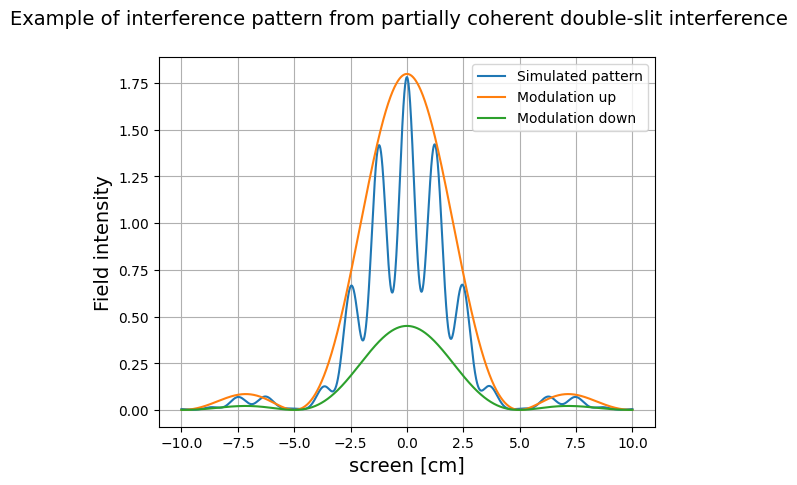

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Patterns/Pattern_1_1.csv')
screen = df['screen'].to_numpy()
pattern = df['pattern'].to_numpy()

slit_width = 1 # [mm]
wavelen = 500 # [nm]
dist_2 = 1e4 # [cm]
dx = screen[1] - screen[0]

slits_dist = df['slits_dist'][0]

slits_dist = slits_dist / 10 # Convert lengths to cm
slit_width = slit_width / 10
wavelen = wavelen / 1e7 

with open('numbers.txt', 'r') as f:
    avg_intensity = float(f.read())

vis = 0.6

tentative = avg_intensity * 2 * (1 + vis) * np.sinc(screen * slit_width / (wavelen * dist_2)) ** 2 * 5 * (slit_width / dx) ** 2/ (np.pi * 200)
tentative_2 = avg_intensity * 2 * (1 - vis) * np.sinc(screen * slit_width / (wavelen * dist_2)) ** 2 * 5 * (slit_width / dx) ** 2/ (np.pi * 200)
 
fig, ax = plt.subplots()

fig.suptitle('Example of interference pattern from partially coherent double-slit interference', fontsize = 14)

ax.plot(screen, pattern, label = 'Simulated pattern')
ax.plot(screen, tentative, label = 'Modulation up')
ax.plot(screen, tentative_2, label = 'Modulation down')
ax.set_xlabel('screen [cm]', fontsize = 14)
ax.set_ylabel('Field intensity', fontsize = 14)

ax.legend()

ax.grid()

